In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Image resizing (Upsampling / Downsampling)

Note that in digital image processing upsampling or downsampling simply means resizing your image. When you upsample you zoom the image and vice-versa. We will use two different spatial domain approach (interpolation method) to achieve this:
1. Nearest Neighbour interpolation/ Pixel replication method [Wiki](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation)
2. Bilinear interpolation method [Wiki](https://en.wikipedia.org/wiki/Bilinear_interpolation)

In this assignment we will will not analyse the frequency domain signal.

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-la9w80ll
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=4b0cdf3957cc2a08549d0744234f0a49d4408d238fef009390d63c9289decc2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-oz4e_doq/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-la9w80ll


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=1, task_no=2) # download data for this assignment

Download Complete!


In [4]:
data = cv2.imread("data/parallel_lines.jpg")

In [5]:
def resize_nn(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    out_img = np.zeros((int(img.shape[0]*k), int(img.shape[1]*k), 3))

    for i in range(3):
        img1 = img[:,:,i] 
        old_shape = img1.shape

        row_ratio, col_ratio = k, k

        # row interpolation 
        r_idx = (np.ceil(np.array(range(1, 1 + int(old_shape[0]*row_ratio)))/row_ratio) - 1).astype(int)

        # column interpolation
        c_idx = (np.ceil(np.array(range(1, 1 + int(old_shape[1]*col_ratio)))/col_ratio) - 1).astype(int)

        out_img[:,:,i] = img1[:, r_idx][c_idx, :].astype('uint8')
        
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [6]:
def resize_bilinear(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    out_img = np.zeros((int(img.shape[0]*k), int(img.shape[1]*k), 3))

    for i in range(3):
        image = img[:,:,i] 
        old_height, old_width = image.shape
        height, width = int(image.shape[1]*k), int(image.shape[0]*k) # New dims

        image = image.ravel()

        y_r, x_r = (old_height - 1) / (height - 1), (old_width - 1) / (width - 1)
        y, x = np.divmod(np.arange(height * width), width)

        # lower pixels
        x_l = np.floor(x_r * x).astype(int)
        y_l = np.floor(y_r * y).astype(int)

        # upper pixels
        x_h = np.ceil(x_r * x).astype(int)
        y_h = np.ceil(y_r * y).astype(int)

        x_s = (x_r * x) - x_l
        y_s = (y_r * y) - y_l

        a0 = image[y_l * old_width + x_l]
        a1 = image[y_l * old_width + x_h]
        a2 = image[y_h * old_width + x_l]
        a3 = image[y_h * old_width + x_h]

        # Unit square alternative algo:
        out_image = a0 * (1 - x_s) * (1 - y_s) + a1 * x_s * (1 - y_s) + a2 * (1 - x_s) * y_s  + a3 * x_s * y_s
        out_img[:,:,i] = out_image.reshape(height, width).astype('uint8')

    #############################
    # End your code here ########
    #############################    
    
    return out_img

#### Sample the given image for following values of k = 0.5, 0.51, 0.99, 2, 2.1 using both the methods. 
Plot the images using `cv2_imshow` and write your observation on the differences with an intuitive explanation.


##############################
k = 0.5
Nearest Neighbor


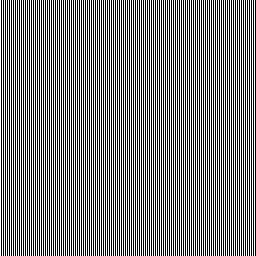

Bilinear


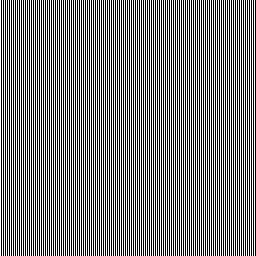

##############################
##############################
k = 0.51
Nearest Neighbor


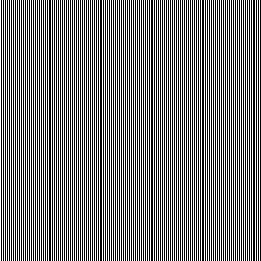

Bilinear


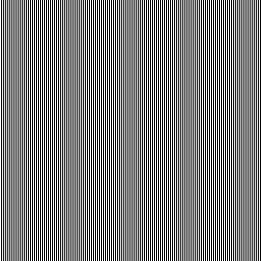

##############################
##############################
k = 0.99
Nearest Neighbor


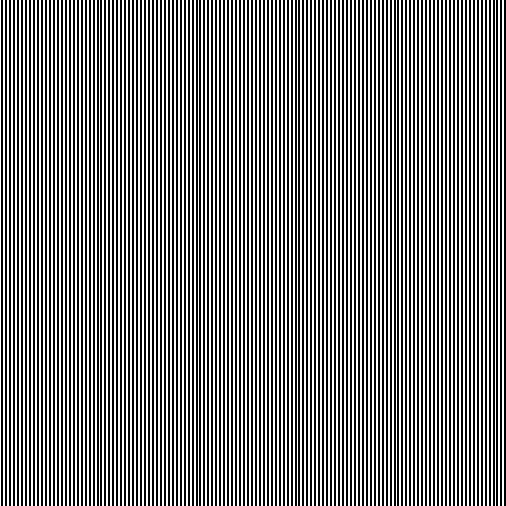

Bilinear


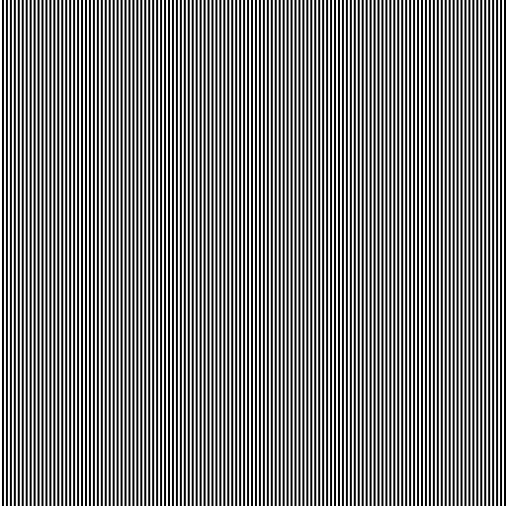

##############################
##############################
k = 2
Nearest Neighbor


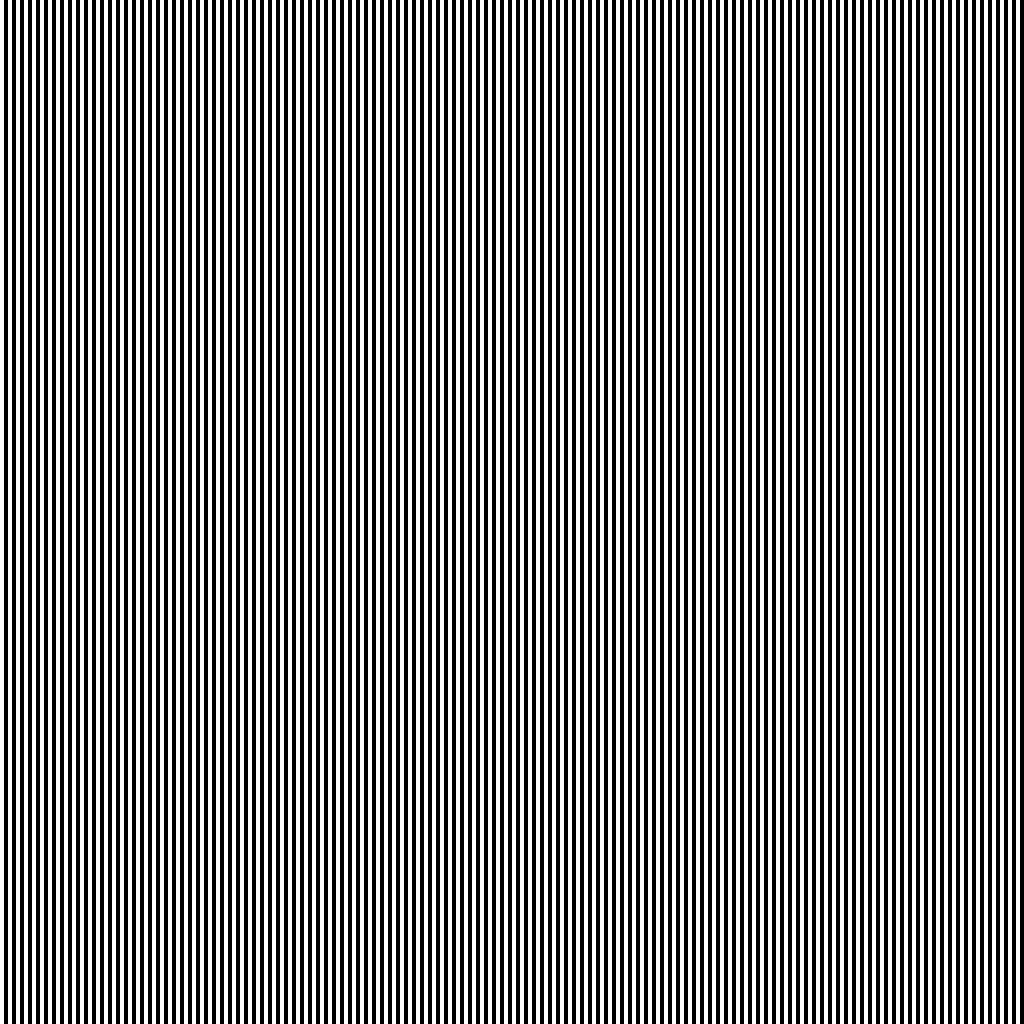

Bilinear


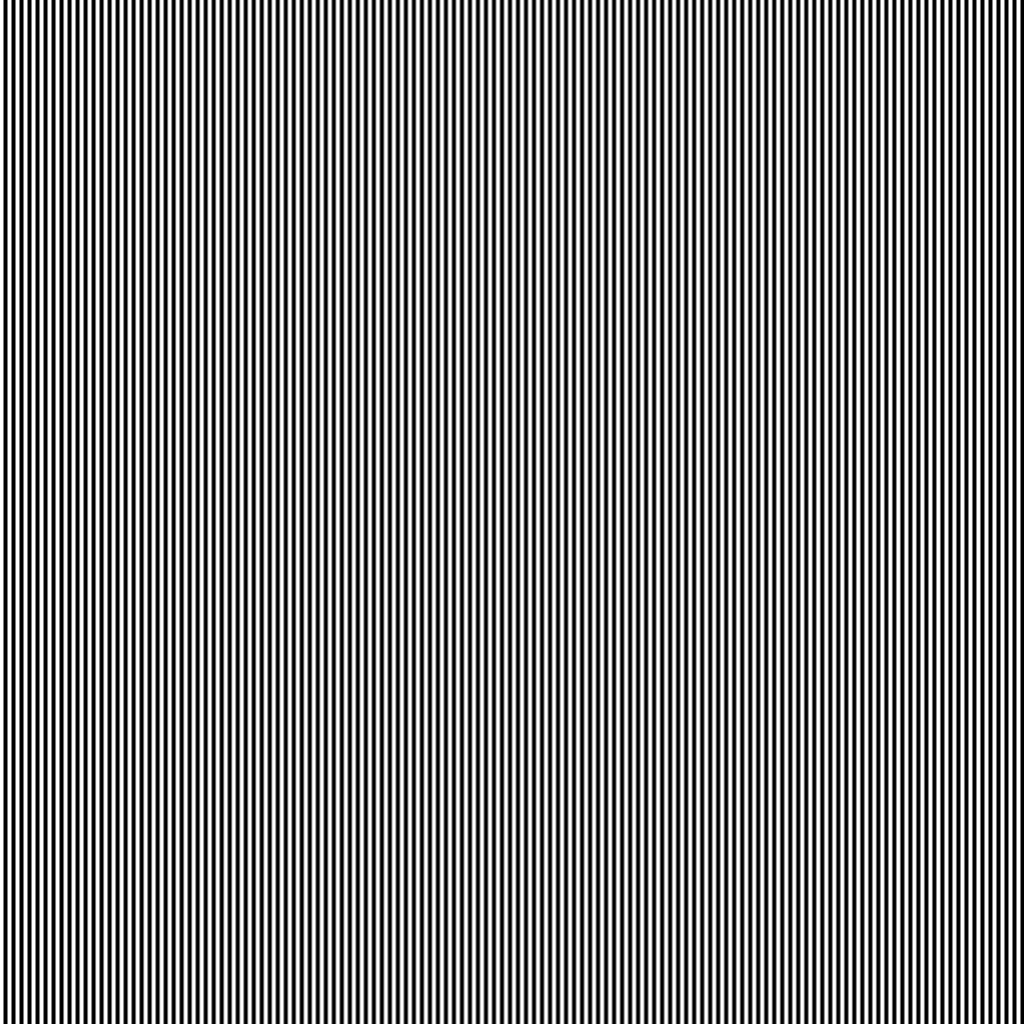

##############################
##############################
k = 2.1
Nearest Neighbor


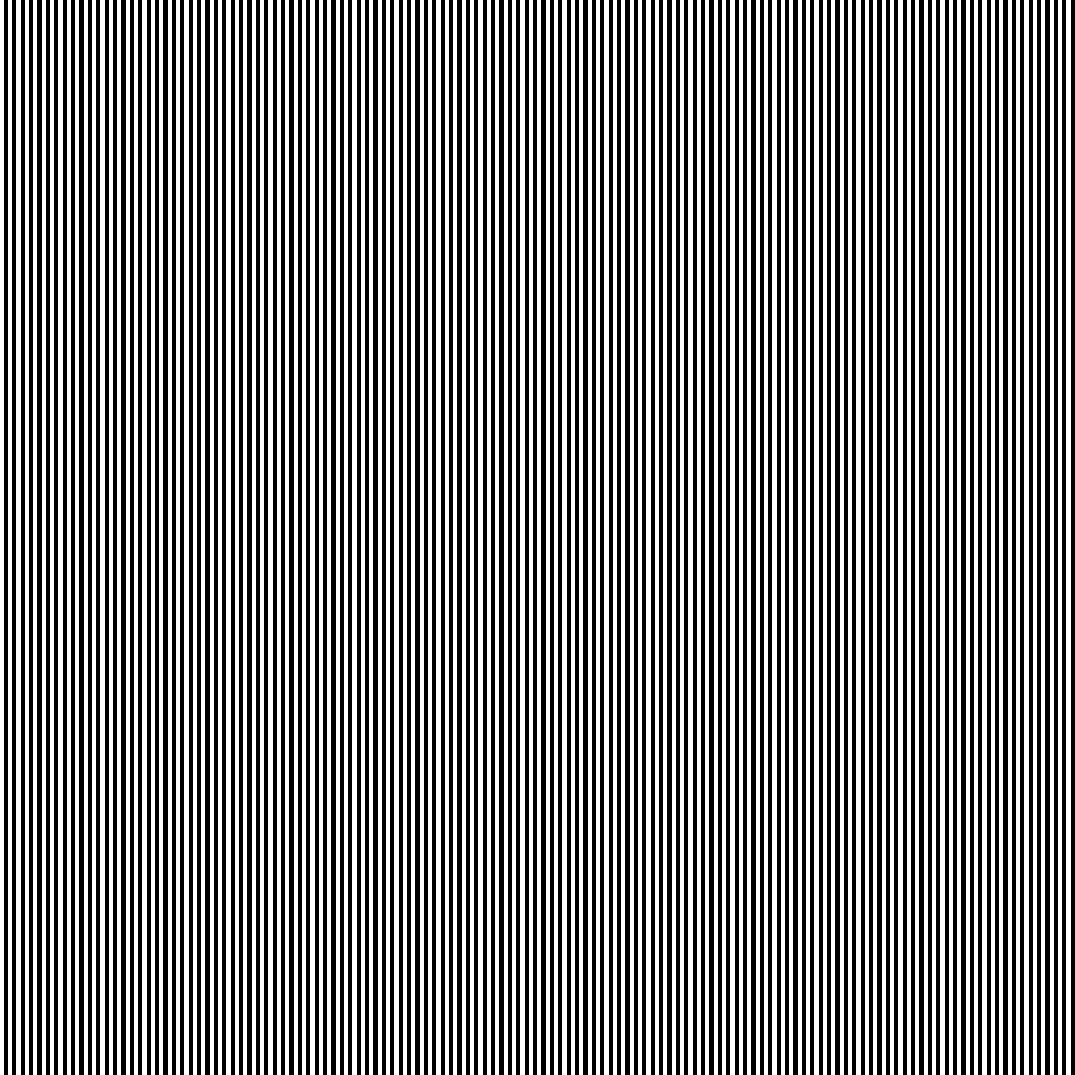

Bilinear


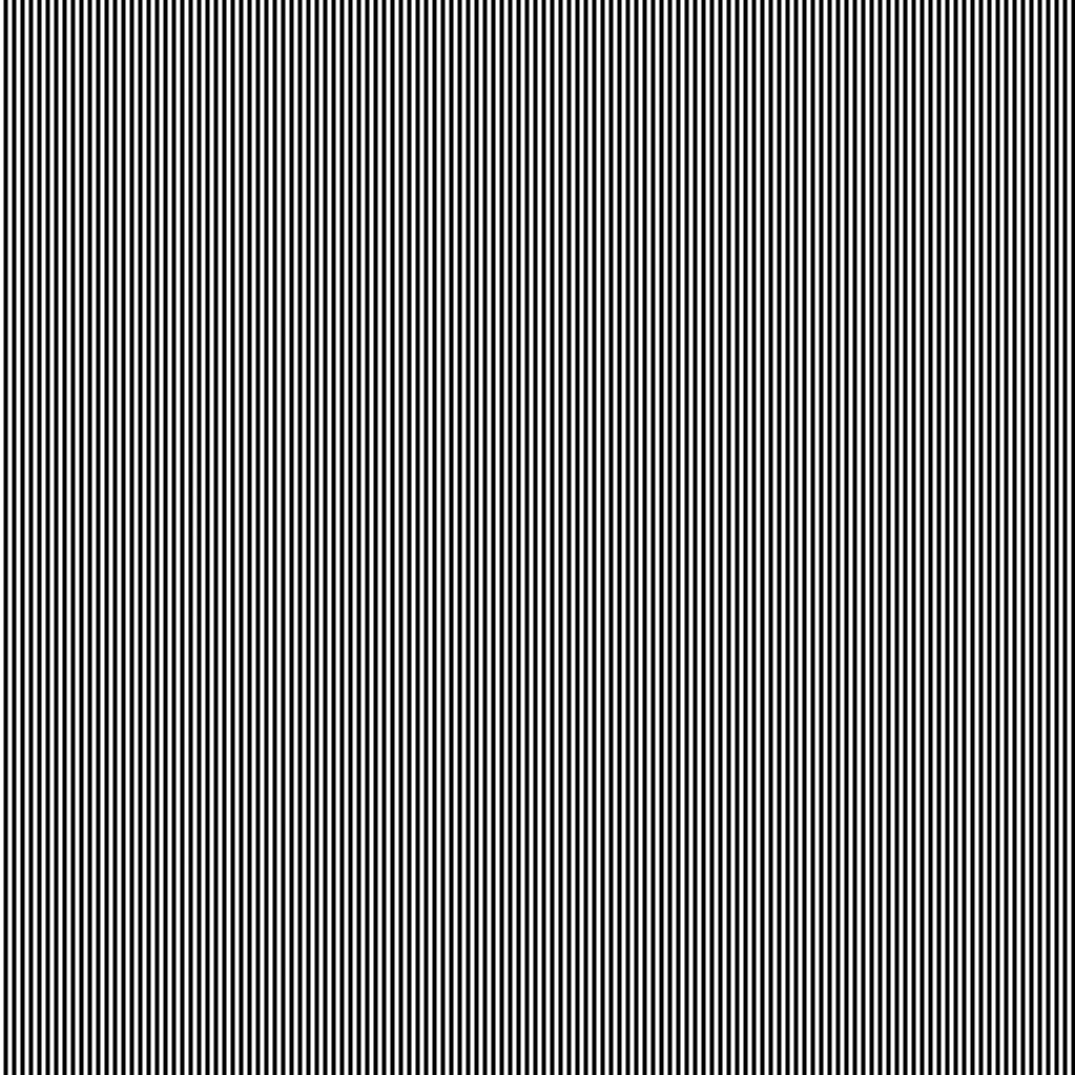

##############################


In [7]:
orig_img = np.copy(data) # Resample this image

#############################
# Start your code from here #
#############################
K = [0.5, 0.51, 0.99, 2, 2.1]

for k in K:
    print('#'*30)
    print(f'k = {k}')

    print('Nearest Neighbor')
    cv2_imshow(resize_nn(orig_img, k))

    print('Bilinear')
    cv2_imshow(resize_bilinear(orig_img, k))
    print('#'*30)

"""
fig, x = plt.subplots(len(K),2, figsize = (18,18))

for i, k in enumerate(K):
    #print(f'k = {k}')

    x[i][0].set_title('Nearest Neighbor')
    x[i][0].cv2_imshow(resize_nn(orig_img, k))

    x[i][1].set_title('Bilinear')
    x[i][1].cv2_imshow(resize_bilinear(orig_img, k))
""";
#############################
# End your code here ########
#############################

In [8]:
your_observation = """
As evident from the produced outputs and theory, when the resizing factor isn't a integer multiple (1/2, 2, 3...) the NN algo 
performs poorly as it produces 'blocky' or 'jagged' output near boundaries and in these lines the effect is maximised while the
spatial angle is small, hence not much difference can be noticed for higher k values due to higher spatial angle.
Whereas the Bilinear interpolation has smoother output due its algo of weighted average pixel value assignment.
"""

print(your_observation)


As evident from the produced outputs and theory, when the resizing factor isn't a integer multiple (1/2, 2, 3...) the NN algo 
performs poorly as it produces 'blocky' or 'jagged' output near boundaries and in these lines the effect is maximised while the
spatial angle is small, hence not much difference can be noticed for higher k values due to higher spatial angle.
Whereas the Bilinear interpolation has smoother output due its algo of weighted average pixel value assignment.

